In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
import fix_yahoo_finance as yf

In [16]:
Df = yf.download('JPM', '2008-01-01', '2018-07-08')

[*********************100%***********************]  1 of 1 downloaded


In [17]:
Df=Df[['Close']]

In [18]:
Df

,Close
Date,
2008-01-02,42.169998
2008-01-03,41.880001
2008-01-04,40.930000
2008-01-07,41.340000
2008-01-08,39.700001
2008-01-09,40.259998
2008-01-10,41.330002
2008-01-11,40.860001
2008-01-14,41.360001


In [19]:
Df= Df.dropna()

In [20]:
Df.Close.plot(figsize=(15,10))

In [21]:
plt.title('AMZN')
plt.ylabel('Price')

Text(0,0.5,'Price')

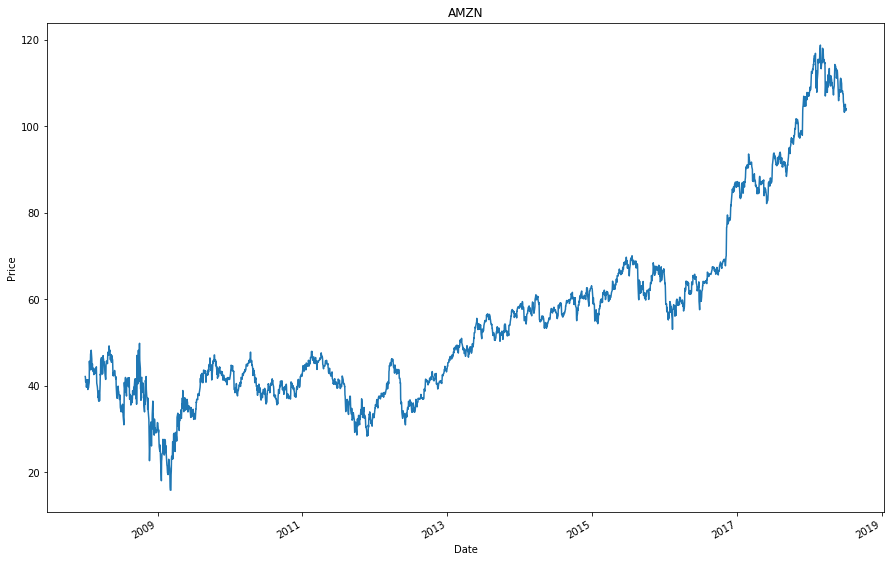

In [22]:
plt.show()

In [23]:
Df['SMA_3'] = Df['Close'].shift(1).rolling(window=3).mean()
Df['SMA_9'] = Df['Close'].shift(1).rolling(window=9).mean()
Df= Df.dropna()
X = Df[['SMA_3','SMA_9']]
X.head()

,SMA_3,SMA_9
Date,,
2008-01-15,41.183335,41.092222
2008-01-16,40.463333,40.758889
2008-01-17,40.653333,40.708889
2008-01-18,40.213333,40.610000
2008-01-22,40.353334,40.415556


In [24]:
y = Df['Close']
y.head()

Date
2008-01-15    39.169998
2008-01-16    41.430000
2008-01-17    40.040001
2008-01-18    39.590000
2008-01-22    40.860001
Name: Close, dtype: float64

In [25]:
t=.8
t= int(t*len(Df))
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [26]:
## Create Linear regression Model
linear = LinearRegression().fit(X_train,y_train)
print ("Price =", round(linear.coef_[0],2), \
"* 3SMA", round(linear.coef_[1],2), \
"* 9SMA +", round(linear.intercept_,2))

Price = 1.1 * 3SMA -0.11 * 9SMA + 0.22


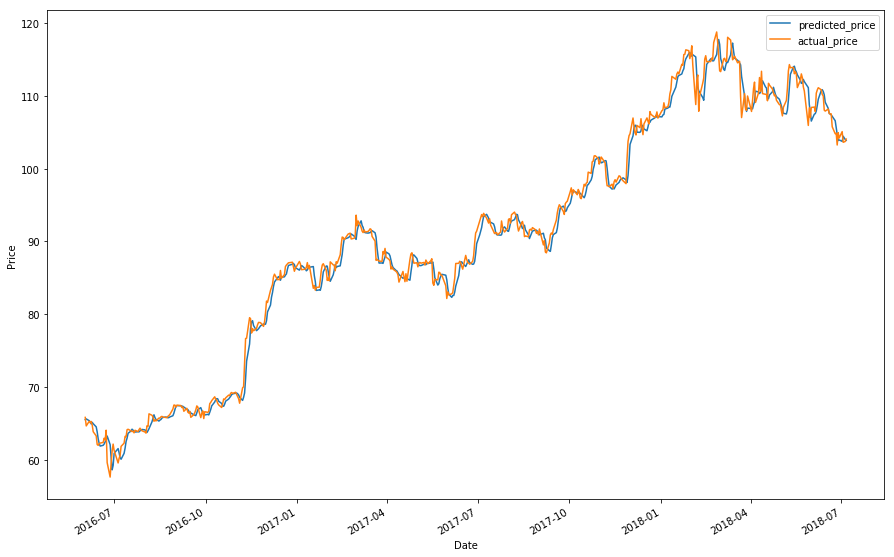

In [27]:
p_price = linear.predict(X_test)
p_price = pd.DataFrame(p_price,index=y_test.index,columns = ['price'])
p_price.plot(figsize=(15,10))
y_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Price")
plt.show()
                                                             

In [28]:
r2 = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2))

99.31